In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\PGA32\Machine Learning\Clustering\2 Project - Heirarchical Clustering\2 Project\Hierarchical Clustering\Dataset")

In [36]:
data = pd.read_csv(r'google_review_ratings.csv')
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [38]:
data.drop(columns=["User"], inplace=True)

In [4]:
data.shape

(5456, 26)

In [40]:
data.drop(columns=["Unnamed: 25"], inplace=True)
data

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [39]:
data

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [5]:
data.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [66]:
data.bfillna(0)

AttributeError: 'DataFrame' object has no attribute 'bfillna'

In [68]:
data['Category 24','Category 11','Category 12'] = data['Category 24','Category 11','Category 12'].fillna(0)

KeyError: ('Category 24', 'Category 11', 'Category 12')

In [69]:
data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    1
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [12]:
data['Category 12'] = data['Category 12'].fillna(0)

In [28]:
data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  Catego

In [54]:
data['Category 11']=pd.to_numeric(data['Category 11'], errors='coerce')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5455 non-null   float64
 1   Category 2   5455 non-null   float64
 2   Category 3   5455 non-null   float64
 3   Category 4   5455 non-null   float64
 4   Category 5   5455 non-null   float64
 5   Category 6   5455 non-null   float64
 6   Category 7   5455 non-null   float64
 7   Category 8   5455 non-null   float64
 8   Category 9   5455 non-null   float64
 9   Category 10  5455 non-null   float64
 10  Category 11  5455 non-null   float64
 11  Category 12  5455 non-null   float64
 12  Category 13  5455 non-null   float64
 13  Category 14  5455 non-null   float64
 14  Category 15  5455 non-null   float64
 15  Category 16  5455 non-null   float64
 16  Category 17  5455 non-null   float64
 17  Category 18  5455 non-null   float64
 18  Category 19  5455 non-null   float64
 19  Catego

In [76]:
from sklearn.preprocessing import MinMaxScaler  # (x-min)/(max-min)
mn=MinMaxScaler()
data_scaled = mn.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.0,0.0,0.726,0.676259,1.0,0.465296,1.0,0.359903,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.726,0.676259,1.0,0.465296,1.0,0.429952,0.358173,0.439141,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.726,0.671463,1.0,0.465296,1.0,0.429952,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
3,0.0,0.1,0.726,0.671463,1.0,0.465296,1.0,0.359903,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.726,0.671463,1.0,0.465296,1.0,0.429952,0.358173,0.436754,...,0.348,0.118,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0


In [77]:
data=data.dropna()

In [78]:
data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

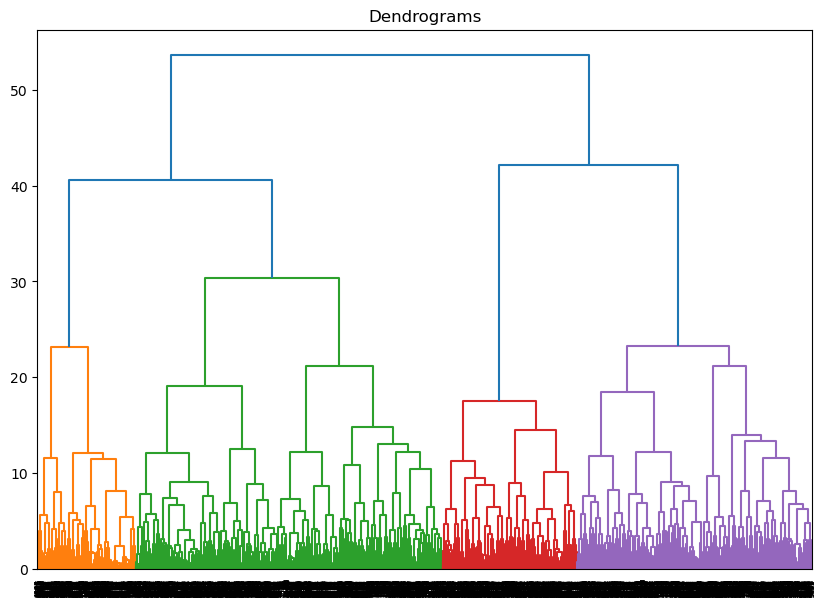

In [79]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

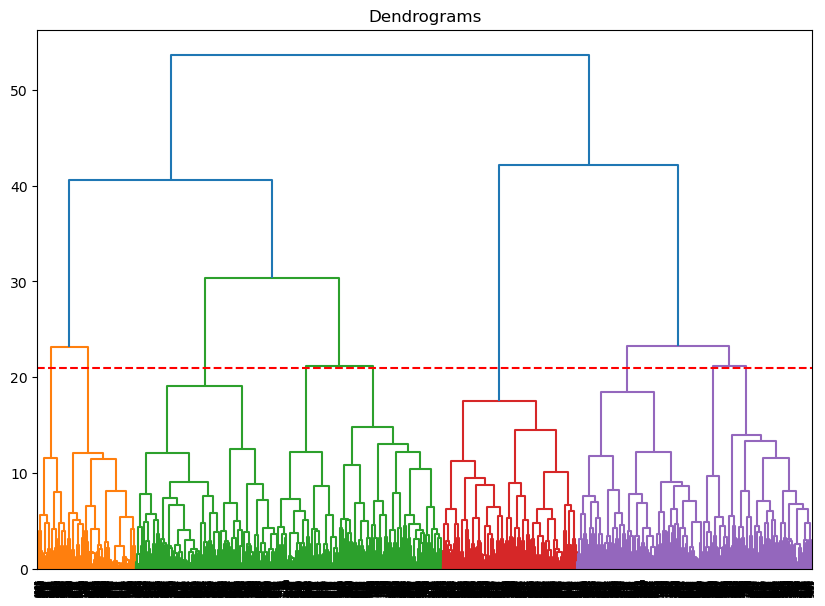

In [81]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

plt.axhline(y=21, color='r', linestyle='--')
plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [88]:
cl=cluster.fit_predict(data_scaled)

C:\Users\amrit\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [89]:
cl

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [90]:
data["Cluster"]=cl

In [91]:
data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [92]:
ov=pd.DataFrame(data.describe().T["mean"]).reset_index()
ov.columns=["var", "Overall_mean"]

clust=data.groupby(["Cluster"]).mean().T.reset_index()
clust.columns=["var", "clust0","clust1","clust2", "clust3"]
df1=pd.merge(ov, clust, on="var", how="inner")
df1.to_csv(r"C:\PGA32\Machine Learning\Clustering\hiprofile5.csv")

In [93]:
ov

,var,Overall_mean
0,Category 1,1.455674
1,Category 2,2.319824
2,Category 3,2.489520
3,Category 4,2.797192
4,Category 5,2.959278
5,Category 6,2.893809
6,Category 7,3.351778
7,Category 8,2.541047
8,Category 9,3.126301
9,Category 10,2.833093


In [ ]:
cluster4

In [ ]:
d_1=data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]].describe().T["mean"].reset_index()

In [ ]:
d_1

In [ ]:
clust

In [ ]:
clust.to_excel("cluster_Hie.xlsx")

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 